<a href="https://colab.research.google.com/github/Thecaiobr/Inteligencia-artifical/blob/main/PlayTenisipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
import pydot
import pydotplus

In [5]:
#lendo os dados e o dataset, alem de criar um array para armazenar os nomes das colunas
col_names = ['outlook','temperature','humidity', 'windy', 'play']
dataset = pd.read_csv("/content/sample_data/weather.nominal.csv", delimiter = ";",header=0, names=col_names)
dataset

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [6]:
#realizando a etapa de pre-processamento, onde se transforma os dados nominais em numericos usando o labelEncoder
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()                    
dataset=dataset.apply(string_to_int.fit_transform) 
dataset

,outlook,temperature,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [7]:
#dividir nossos dados em conjunto de atributos e rótulo:
feature_cols = ['outlook','temperature','humidity','windy']
X = dataset[feature_cols ]                               #contains the attribute 
y = dataset.play    

In [9]:
#dividir nossos dados em conjuntos de treinamento e teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

In [10]:
#Treinando e realizando predições
classifier = DecisionTreeClassifier(criterion="entropy", random_state=0)     # create a classifier object
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [11]:
#Prever a resposta para o conjunto de dados de teste
y_pred= classifier.predict(X_test)  

In [12]:
#testando a acuracia/precisao do modelo
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


In [13]:
#verificando valores previstos com os valores reais para testar a acuracia
data_p=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
data_p

,Actual,Predicted
2,1,1
10,1,0
6,1,1


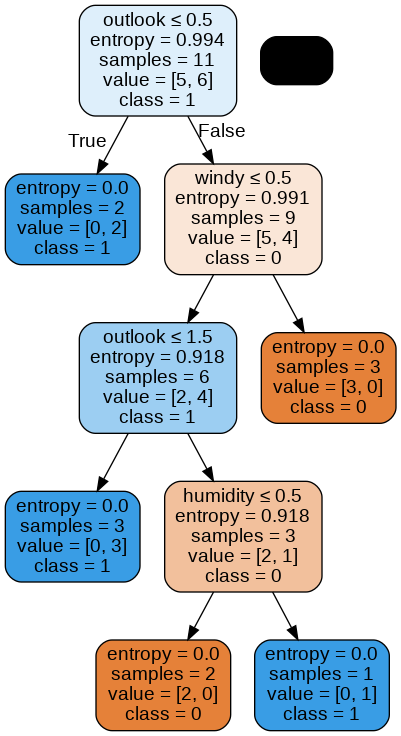

In [14]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
filled=True, rounded=True,
special_characters=True,feature_names =feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Play Tennis.png')
Image(graph.create_png())

In [18]:
# Importar a biblioteca para mostrar a matriz de confusão da árvore
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

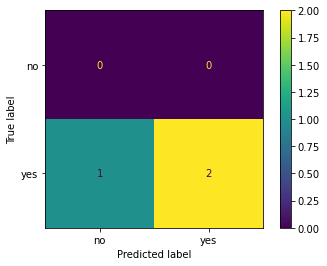

In [19]:
conf_matrix = confusion_matrix(y_test, classifier.predict(X_test))
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=['no','yes'])
cmd.plot(values_format="d")
plt.show()

In [16]:
# Importando bibliotecas para calcular métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [20]:
# Mostrar métricas
print("Accuracy score = ", accuracy_score(y_test, classifier.predict(X_test)))
print('\n')
print(classification_report(y_test, classifier.predict(X_test)))
print('\n')

tn, fp, fn, tp = confusion_matrix(y_test, classifier.predict(X_test)).ravel()
tnr = tn / (tn + fp) # true negative rate 
fpr = fp / (tn + fp) # false positive rate 
fnr = fn / (fn + tp) # false negative rate 
tpr = tp / (tp + fn) # true positive rate
print('True negative rate: ' + str(tnr))
print('False positive rate: ' + str(fpr))
print('False negative rate: ' + str(fnr))
print('True positive rate: ' + str(tpr))

Accuracy score =  0.6666666666666666


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.67      0.80         3

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



True negative rate: nan
False positive rate: nan
False negative rate: 0.3333333333333333
True positive rate: 0.6666666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid val